<a href="https://colab.research.google.com/github/ranjannalini10/energy_appliance_prediction/blob/main/CP_2%5BAppliances_Energy_Prediction%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium as fo
import plotly.graph_objects as go
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path ='/content/drive/MyDrive/data_application_energy.csv'
df=pd.read_csv(file_path,encoding_errors='ignore')

Mounted at /content/drive


In [ ]:
#dataset first View
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# Dataset Rows & Columns count
df.shape

(19735, 29)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


In [ ]:
# Missing Values/Null Values Count
nan_count = df.isna().sum(axis = 0)
nan_count

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
#check for unique values
column_list = df.columns.values.tolist()
no_unique=[]
for column_name in column_list:
  no_unique.append(df[column_name].nunique())
unique = pd.DataFrame(list(zip(column_list, no_unique)),
               columns =['variable', 'no. of uniques values'])
unique.head(10)

,variable,no. of uniques values
0,date,19735
1,Appliances,92
2,lights,8
3,T1,722
4,RH_1,2547
5,T2,1650
6,RH_2,3376
7,T3,1426
8,RH_3,2618
9,T4,1390


In [ ]:
df_new = df.rename(columns={
    "date": "Date",
    "lights": "Light_Energy",
    "T1": "Kitchen_Temp",
    "RH_1": "Kitchen_Humidity",
    "T2": "Living_Room_Temp",
    "RH_2": "Living_Room_Humidity",
    "T3": "Laundry_Room_Temp",
    "RH_3": "Laundry_Room_Humidity",
    "T4": "Office_Room_Temp",
    "RH_4": "Office_Room_Humidity",
    "T5": "Bathroom_Temp",
    "RH_5": "Bathroom_Humidity",
    "T6": "Outside_North_Temp",
    "RH_6": "Outside_North_Humidity",
    "T7": "Ironing_Room_Temp",
    "RH_7": "Ironing_Room_Humidity",
    "T8": "Teenager_Room_Temp",
    "RH_8": "Teenager_Room_Humidity",
    "T9": "Parents_Room_Temp",
    "RH_9": "Parents_Room_Humidity",
    "T_out": "Outside_Temp",
    "Press_mm_hg": "Pressure",
    "RH_out": "Outside_Humidity",
    "Windspeed": "WindSpeed",
    "Visibility": "Visibility",
    "Tdewpoint": "DewPoint_Temp",
    "rv1": "Random_Variable1",
    "rv2": "Random_Variable2",
})

df_new.head(1)


,Date,Appliances,Light_Energy,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,Bathroom_Temp,Bathroom_Humidity,Outside_North_Temp,Outside_North_Humidity,Ironing_Room_Temp,Ironing_Room_Humidity,Teenager_Room_Temp,Teenager_Room_Humidity,Parents_Room_Temp,Parents_Room_Humidity,Outside_Temp,Pressure,Outside_Humidity,WindSpeed,Visibility,DewPoint_Temp,Random_Variable1,Random_Variable2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.9,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433


In [ ]:
df_new['Mean_indoor_temperature'] = df_new[['Kitchen_Temp', 'Living_Room_Temp', 'Laundry_Room_Temp', 'Office_Room_Temp', 'Bathroom_Temp', 'Outside_North_Temp', 'Ironing_Room_Temp', 'Teenager_Room_Temp', 'Parents_Room_Temp']].mean(axis=1)

df_new['Mean_outdoor_temperature'] = df_new['Outside_Temp']

df_new['Mean_indoor_humidity'] = df_new[['Kitchen_Humidity', 'Living_Room_Humidity', 'Laundry_Room_Humidity', 'Office_Room_Humidity', 'Bathroom_Humidity', 'Outside_North_Humidity', 'Ironing_Room_Humidity', 'Teenager_Room_Humidity', 'Parents_Room_Humidity']].mean(axis=1)

df_new['Mean_outdoor_humidity'] = df_new['Outside_Humidity']
df_new['Total_consumption'] = df_new[['Appliances', 'Light_Energy']].sum(axis=1)

In [ ]:
df_new['date']=pd.to_datetime(df["date"],format='%Y-%m-%d %H:%M:%S')
df_new['date'] =  pd.to_datetime(df['date'],errors='ignore')
df_new['date1'] =(df_new['date']).dt.date
df_new['time'] =df_new['date'].dt.time
df_new['day_name'] = df_new['date'].dt.day_name()
df_new['month'] = df_new['date'].dt.month
df_new['week'] = df_new['date'].dt.week
df_new['hour'] = df_new['date'].dt.hour
df_new['dayofweek'] = df_new['date'].dt.dayofweek
df_new['Day/Night'] = df_new['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')
df_new.head(1)

<ipython-input-42-169db66657ca>:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



,Date,Appliances,Light_Energy,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,Bathroom_Temp,Bathroom_Humidity,Outside_North_Temp,Outside_North_Humidity,Ironing_Room_Temp,Ironing_Room_Humidity,Teenager_Room_Temp,Teenager_Room_Humidity,Parents_Room_Temp,Parents_Room_Humidity,Outside_Temp,Pressure,Outside_Humidity,WindSpeed,Visibility,DewPoint_Temp,Random_Variable1,Random_Variable2,Mean_indoor_temperature,Mean_outdoor_temperature,Mean_indoor_humidity,Mean_outdoor_humidity,Total_consumption,date,date1,time,day_name,month,week,hour,dayofweek,dayofweek/weekend,Day/Night
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.9,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433,17.167407,6.6,50.910741,92.0,90,2016-01-11 17:00:00,2016-01-11,17:00:00,Monday,1,2,17,0,dayofweek,Day


In [ ]:
df_new['dayofweek/weekend']=''
for i in range(len(df_new)):
    if df_new['dayofweek'][i] >= 5:
        df_new['dayofweek/weekend'][i] = "weekend"
    else:
        df_new['dayofweek/weekend'][i] = "dayofweek"

df_new.head(5)

<ipython-input-14-fc62f705383f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['dayofweek/weekend'][i] = "dayofweek"
<ipython-input-14-fc62f705383f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['dayofweek/weekend'][i] = "weekend"


,Date,Appliances,Light_Energy,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,Bathroom_Temp,Bathroom_Humidity,Outside_North_Temp,Outside_North_Humidity,Ironing_Room_Temp,Ironing_Room_Humidity,Teenager_Room_Temp,Teenager_Room_Humidity,Parents_Room_Temp,Parents_Room_Humidity,Outside_Temp,Pressure,Outside_Humidity,WindSpeed,Visibility,DewPoint_Temp,Random_Variable1,Random_Variable2,Mean_indoor_temperature,Mean_outdoor_temperature,Mean_indoor_humidity,Mean_outdoor_humidity,Total_consumption,date,date1,time,day_name,month,week,hour,dayofweek,dayofweek/weekend
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17.167407,6.600000,50.910741,92.0,90,2016-01-11 17:00:00,2016-01-11,17:00:00,Monday,1,2,17,0,dayofweek
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17.149630,6.483333,50.827222,92.0,90,2016-01-11 17:10:00,2016-01-11,17:10:00,Monday,1,2,17,0,dayofweek
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17.103704,6.366667,50.628889,92.0,80,2016-01-11 17:20:00,2016-01-11,17:20:00,Monday,1,2,17,0,dayofweek
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17.067037,6.250000,50.574815,92.0,90,2016-01-11 17:30:00,2016-01-11,17:30:00,Monday,1,2,17,0,dayofweek
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17.070741,6.133333,50.732963,92.0,100,2016-01-11 17:40:00,2016-01-11,17:40:00,Monday,1,2,17,0,dayofweek


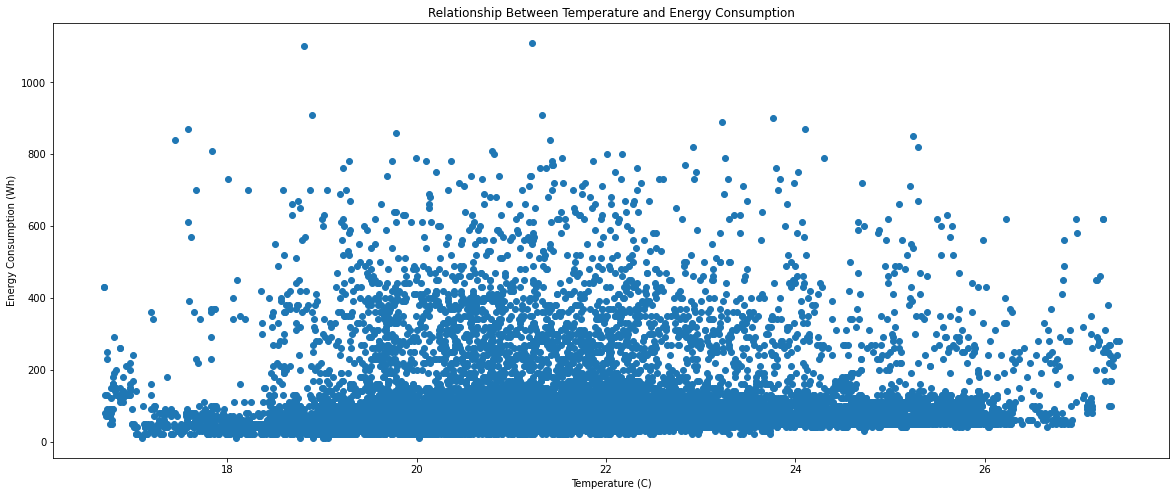

In [ ]:
# Chart 1 comparison between energy and temperature 

temp_cols = ['Kitchen_Temp', 'Living_Room_Temp', 'Laundry_Room_Temp']
energy_cols = ['Appliances', 'Light_Energy']
df_temp = df_new[temp_cols].mean(axis=1)
df_energy = df_new[energy_cols].sum(axis=1)
df_energy.head(10)

#Graph

plt.figure(figsize=(20,8))
plt.scatter(df_temp, df_energy)
plt.xlabel('Temperature (C)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Relationship Between Temperature and Energy Consumption')
plt.show()

In [ ]:
# Chart 2 Appliances that consumes more energy

appliances = df_new[['Appliances', 'Light_Energy', 'Kitchen_Temp', 'Kitchen_Humidity', 'Living_Room_Temp', 'Living_Room_Humidity', 'Laundry_Room_Temp', 'Laundry_Room_Humidity', 'Office_Room_Temp', 'Office_Room_Humidity', 'Bathroom_Temp',	'Bathroom_Humidity',	'Outside_North_Temp',	'Outside_North_Humidity',	'Ironing_Room_Temp',	'Ironing_Room_Humidity',	'Teenager_Room_Temp',	'Teenager_Room_Humidity',	'Parents_Room_Temp',	'Parents_Room_Humidity']]
average_consumption = appliances.mean()
sorted_appliances = average_consumption.sort_values(ascending=False)
sorted_appliances


#Graph


Appliances                97.694958
Outside_North_Humidity    54.609083
Bathroom_Humidity         50.949283
Teenager_Room_Humidity    42.936165
Parents_Room_Humidity     41.552401
Living_Room_Humidity      40.420420
Kitchen_Humidity          40.259739
Laundry_Room_Humidity     39.242500
Office_Room_Humidity      39.026904
Ironing_Room_Humidity     35.388200
Laundry_Room_Temp         22.267611
Teenager_Room_Temp        22.029107
Kitchen_Temp              21.686571
Office_Room_Temp          20.855335
Living_Room_Temp          20.341219
Ironing_Room_Temp         20.267106
Bathroom_Temp             19.592106
Parents_Room_Temp         19.485828
Outside_North_Temp         7.910939
Light_Energy               3.801875
dtype: float64

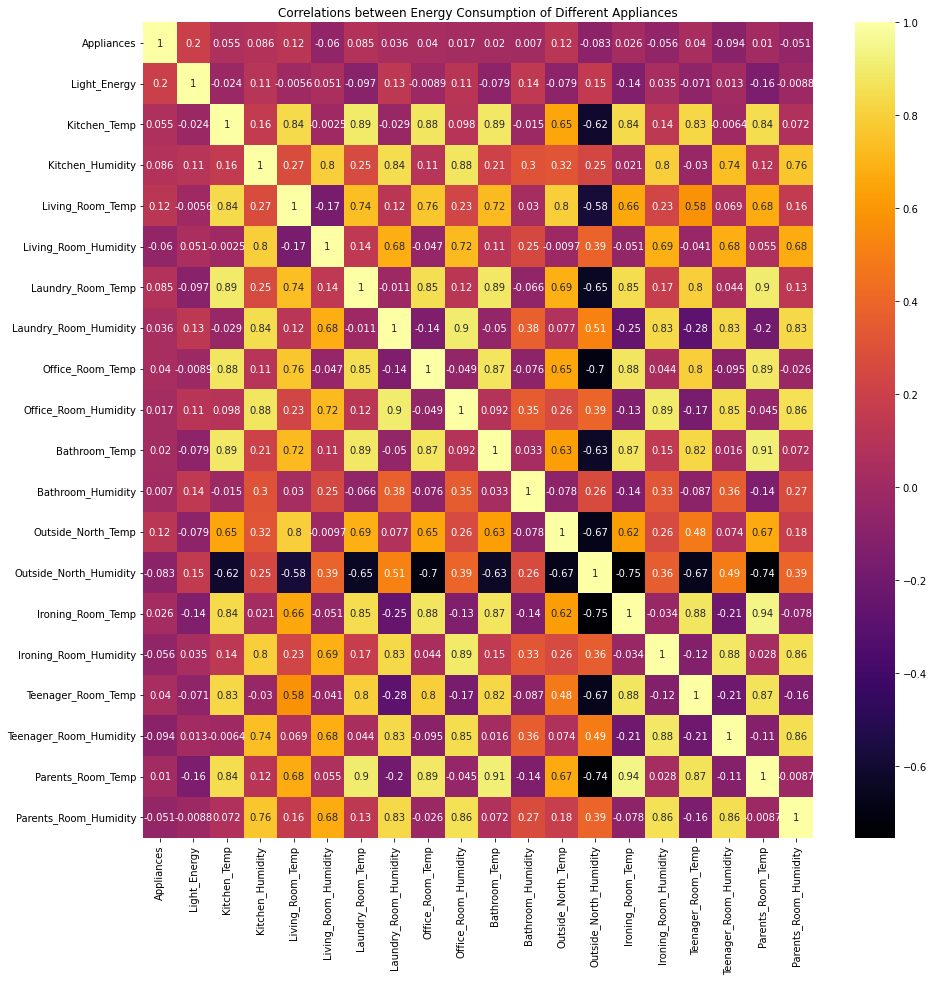

In [ ]:
# Chart 3 Corelation matrix between energy consumption of different appliances

appliance_cols = ['Appliances', 'Light_Energy', 'Kitchen_Temp', 'Kitchen_Humidity', 'Living_Room_Temp', 'Living_Room_Humidity', 'Laundry_Room_Temp', 'Laundry_Room_Humidity', 'Office_Room_Temp', 'Office_Room_Humidity', 'Bathroom_Temp',	'Bathroom_Humidity',	'Outside_North_Temp',	'Outside_North_Humidity',	'Ironing_Room_Temp',	'Ironing_Room_Humidity',	'Teenager_Room_Temp',	'Teenager_Room_Humidity',	'Parents_Room_Temp',	'Parents_Room_Humidity']
corr_matrix = df_new[appliance_cols].corr()

# Graph
plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='inferno', annot=True)
plt.title('Correlations between Energy Consumption of Different Appliances')
plt.show()

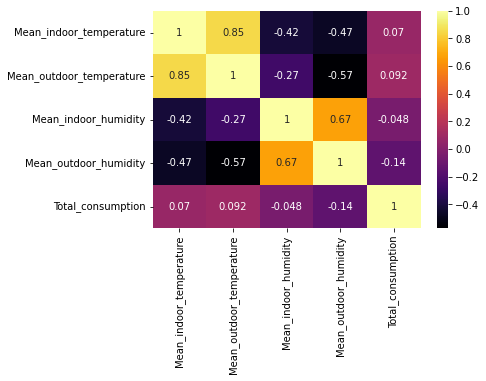

In [ ]:
#Chart 4 co-relation between mean temperatures and humidity with total consumption

col_list4corr = df_new[['Mean_indoor_temperature','Mean_outdoor_temperature','Mean_indoor_humidity','Mean_outdoor_humidity','Total_consumption']]
corr_matrix = col_list4corr.corr()

sns.heatmap(corr_matrix, cmap='inferno', annot=True)

plt.show()

In [ ]:
#Chart 5 Energy consumption per day per hour and per week

avg_energy = pd.pivot_table(df_new, values='Appliances', index='hour', columns='dayofweek', aggfunc='mean')

fig = go.Figure()
for i in range(7):
    fig.add_trace(go.Scatter(x=avg_energy.index, y=avg_energy[i], name=str(i)))
avg_energy


#Graph
fig.update_layout(title='Hourly Energy Consumption by Day of Week',
                  xaxis_title='Hour of Day',
                  yaxis_title='Energy Consumption (Wh)')

fig.show()

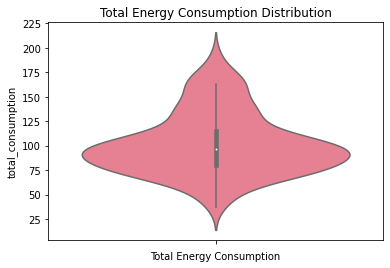

In [ ]:
#Chart 6 Total energy consumption of building for each date
total_energy = df_new.groupby('date1').agg({'Appliances':'mean', 'Light_Energy':'mean'})
total_energy['total_consumption'] = total_energy[['Appliances', 'Light_Energy']].sum(axis=1)
total_energy.head(10)


#Graph

sns.violinplot(y="total_consumption", data=total_energy, palette="husl", box=True)
plt.title("Total Energy Consumption Distribution")
plt.xlabel("Total Energy Consumption")
plt.show()

#Graph 2

fig = px.violin(total_energy, x='total_consumption')
fig.update_layout(title="Total Energy Consumption Distribution", xaxis_title="Total Energy Consumption")
fig.show()

<ipython-input-41-9d9da5e59b98>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



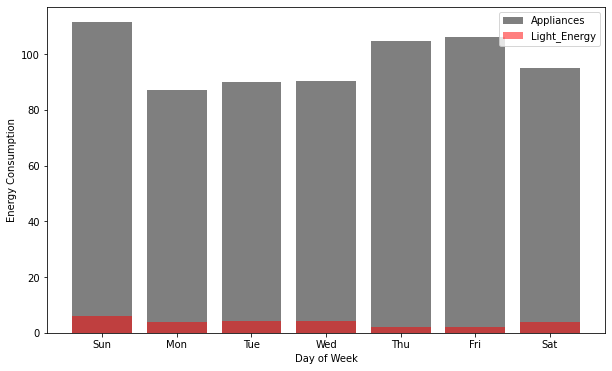

In [ ]:
#Chart 7 Energy consumption on weekdays and weekend

energy_wd_wknd = df_new.groupby('dayofweek')['Appliances', 'Light_Energy'].mean()
energy_wd_wknd


#Graph

plt.figure(figsize=(10,6))
plt.bar(energy_wd_wknd.index, energy_wd_wknd['Appliances'], color='black', alpha= 0.5, label='Appliances')
plt.bar(energy_wd_wknd.index, energy_wd_wknd['Light_Energy'], color='red', alpha= 0.5, label='Light_Energy')
plt.xticks([0,1,2,3,4,5,6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

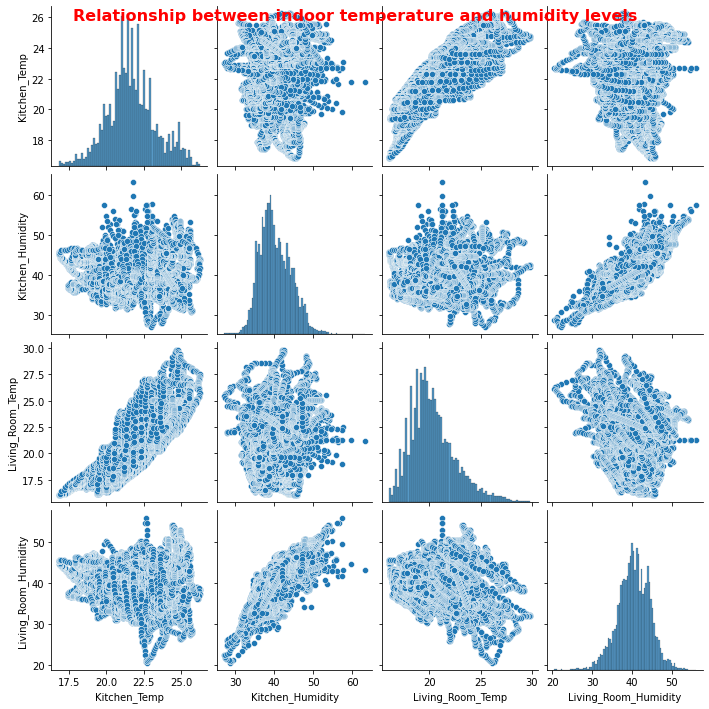

In [ ]:
#Chart 8 Relationship between indoor temperature and humidity levels

columns_taken = ['Kitchen_Temp', 'Kitchen_Humidity', 'Living_Room_Temp', 'Living_Room_Humidity']


#Graph

sns.pairplot(df_new[columns_taken])
plt.suptitle('Relationship between indoor temperature and humidity levels', fontsize=16, fontweight ='bold', color = 'Red')
plt.show()

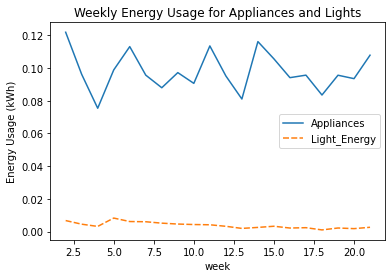

In [ ]:
#Chart 9 Energy consumption per week

energy_per_week = df_new.groupby("week").agg({'Appliances': 'mean', 'Light_Energy': 'mean'}) /1000
energy_per_week


#Graph

sns.lineplot(data=energy_per_week)
plt.title('Weekly Energy Usage for Appliances and Lights')
plt.xlabel('week')
plt.ylabel('Energy Usage (kWh)')
plt.show()

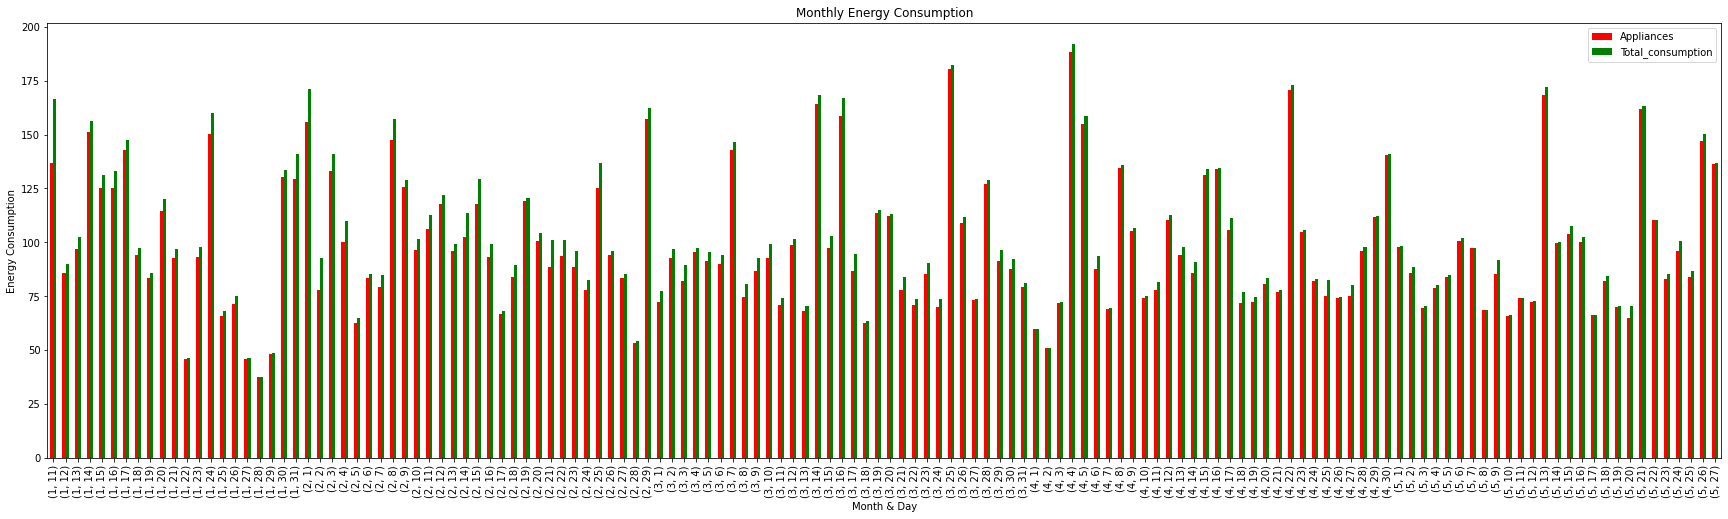

In [ ]:
#Chart 10 Energy consumption for all 4 months

Monthly_consumption = df_new.groupby([df_new['date'].dt.month, df_new['date'].dt.day]).agg({'Appliances': 'mean', 'Total_consumption': 'mean'})
Monthly_consumption

Monthly_consumption.index = Monthly_consumption.index.set_names(['month', 'day'])
Monthly_consumption


#Graph

Monthly_consumption.plot.bar(figsize=(30,8),color=['red', 'green',])
plt.title('Monthly Energy Consumption')
plt.xlabel('Month & Day')
plt.ylabel('Energy Consumption')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

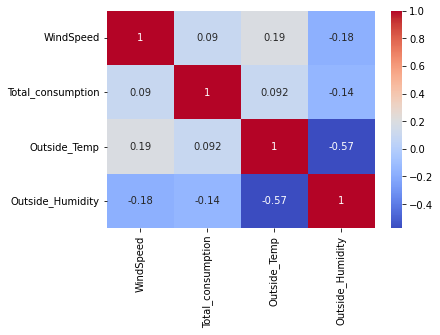

In [ ]:
#Chart 11 Calculating Correlation Heatmap Between Wind Speed, Total Energy Consumption, Outside Temperature, and Outside Humidity.

ws_energy_cons = df_new[['WindSpeed', 'Total_consumption', 'Outside_Temp', 'Outside_Humidity']]
corr_ws_energy = ws_energy_cons.corr()
corr_ws_energy

sns.heatmap(corr_ws_energy, annot=True, cmap='coolwarm')
plt.show

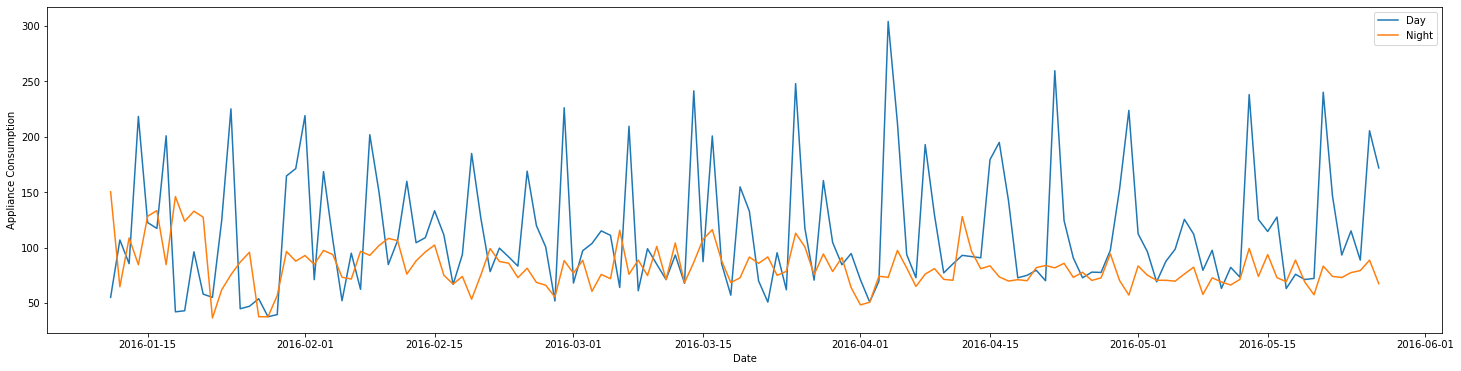

In [ ]:
# Chart 12 Calculate Mean Energy Consumption for Appliances and Lights

d_n_energy_con= df_new.groupby(['date1', 'Day/Night']).agg({'Appliances': 'mean', 'Light_Energy': 'mean'}).reset_index()
d_n_energy_con


#Graph

day_data = d_n_energy_con[d_n_energy_con['Day/Night'] == 'Day']
night_data = d_n_energy_con[d_n_energy_con['Day/Night'] == 'Night']
plt.figure(figsize=(25, 6))
plt.plot(day_data['date1'], day_data['Appliances'], label='Day')
plt.plot(night_data['date1'], night_data['Appliances'], label='Night')
plt.xlabel('Date')
plt.ylabel('Appliance Consumption')
plt.legend()

In [ ]:
#box plot karna hai, outliers k liye

In [ ]:
#Change in energy consumption wrt temperature for all 4 months

In [ ]:
#Week-weekend (groupyby week) for all 4 months